<a href="https://colab.research.google.com/github/DeepanshuThakur06/Medical-insurance-Cost-forecast/blob/main/Medical_Insurance_Cost_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Problem statement

This project aims to analyze a medical insurance dataset and build a predictive model to estimate a person’s insurance charges based on key demographic and health-related factors such as age, sex, BMI, number of children, smoking status, and region. The objective is to understand how these features influence medical costs and develop a reliable regression model that can predict insurance charges for new customers. This helps insurance companies in pricing policies more accurately and supports data-driven decision making in risk assessment and premium calculation.

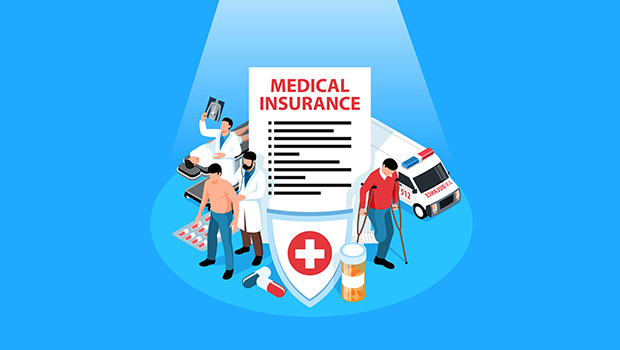

#### Dataset upload and Info

In [2]:
##### import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

In [25]:
df=pd.read_csv('/content/drive/MyDrive/2026- Machine learning project/insurance.csv')

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [29]:
df= df.drop("region",axis=1)

#### EDA

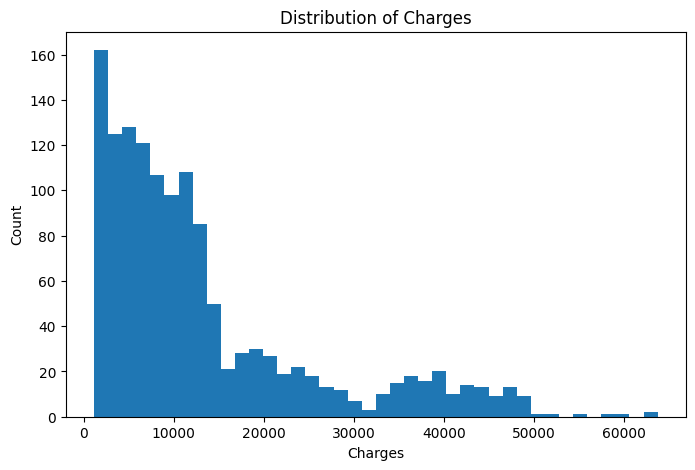

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["charges"], bins=40)
plt.xlabel("Charges")
plt.ylabel("Count")
plt.title("Distribution of Charges")
plt.show()

<Figure size 700x500 with 0 Axes>

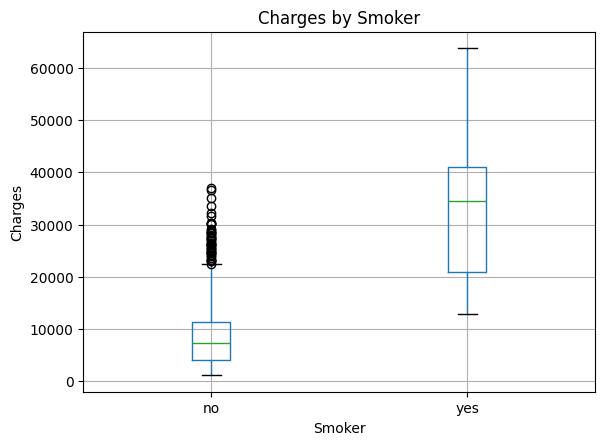

In [97]:
#### Charges: Smoker vs Non-smoker
plt.figure(figsize=(7,5))
df.boxplot(column="charges", by="smoker")
plt.title("Charges by Smoker")
plt.suptitle("")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

Non-smokers: median charges ≈ 7–8k

Smokers: median charges ≈ 34–35k

👉 Smokers pay ~4–5× higher medical charges on average.


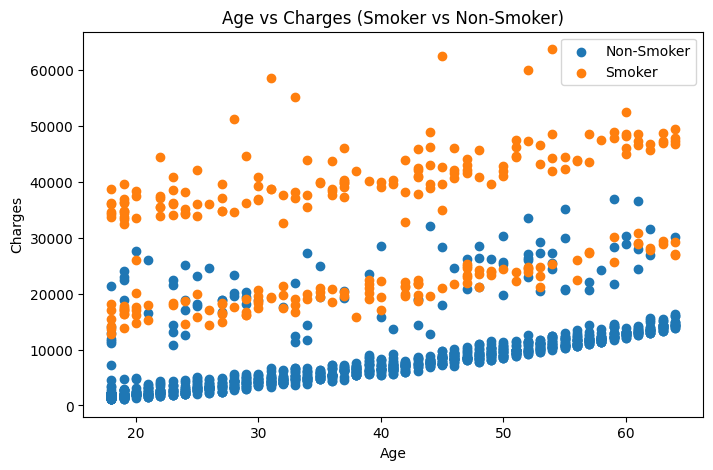

In [98]:
smoker_yes = df[df["smoker"]=="yes"]
smoker_no = df[df["smoker"]=="no"]

plt.figure(figsize=(8,5))
plt.scatter(smoker_no["age"], smoker_no["charges"], label="Non-Smoker")
plt.scatter(smoker_yes["age"], smoker_yes["charges"], label="Smoker")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges (Smoker vs Non-Smoker)")
plt.legend()
plt.show()

In [30]:
df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [31]:
df_encode=pd.get_dummies(df,drop_first=True).astype(int)
df_encode

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [35]:
df_encode.corr(numeric_only=True)["charges"]

,charges
age,0.299009
bmi,0.196188
children,0.067999
charges,1.000000
sex_male,0.057293
smoker_yes,0.787251


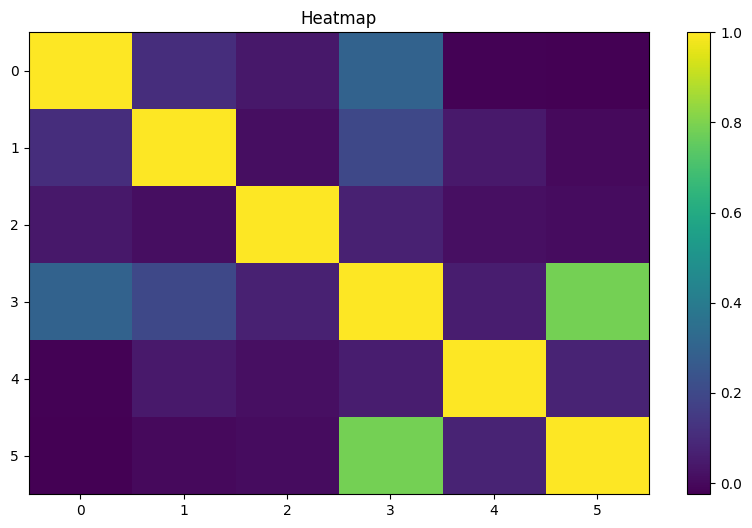

In [36]:

corr=df_encode.corr()
plt.figure(figsize=(10,6))
plt.imshow(corr,aspect='auto')
plt.colorbar()
plt.title("Heatmap")
plt.show()

In [42]:
df_encode["log charges"]=np.log(df['charges'])

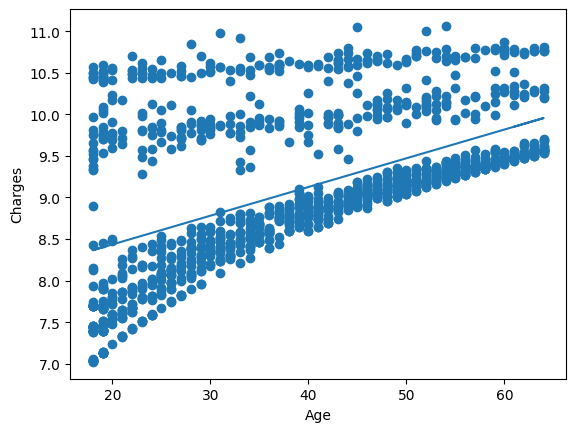

In [44]:
#### Linear relationship between the independent and dependent features
x=df_encode['age']
y=df_encode['log charges']
m, c = np.polyfit(x, y, 1)   # best fit line equation y = mx + c
plt.scatter(x,y)
plt.plot(x,m*x+c)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [48]:
X= df_encode.drop(["charges","log charges"],axis=1)
Y= df_encode["log charges"]

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [55]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [56]:
regression=LinearRegression()

In [57]:
regression.fit(X_train,Y_train)

LinearRegression()

In [58]:
print('Coefficient:-', regression.coef_)
print('Intercept:-', regression.intercept_)

Coefficient:- [ 0.48768352  0.06636705  0.11638145 -0.03506078  0.62379627]
Intercept:- 9.10248120983105


In [61]:
y_pred=regression.predict(X_test)
y_pred

array([ 9.05166604,  8.60058624, 11.07381286,  9.11295739,  9.4947563 ,
        8.68969836,  7.92169713,  9.58064706,  8.17945514,  9.25024322,
       10.08999247,  8.89755783,  8.44295616, 10.8441978 , 11.01876862,
       10.73826331,  9.37780622, 10.68971259,  9.0227813 , 10.34396126,
        8.55441338,  8.98908172,  7.9396296 ,  8.21308247,  9.35512245,
        9.24818753,  9.48973788,  8.5777754 ,  9.13218282,  7.90487476,
        9.11524208,  9.34144494,  8.1232921 ,  8.56096173,  8.27957437,
        8.94231935,  8.13189614,  8.92952389, 10.73140149, 10.22627787,
        8.47104428,  8.15156212,  9.44737943,  9.27478758,  8.67455467,
        9.39346269,  8.30560679,  8.44222308, 10.66288354,  8.63806631,
        9.6050095 ,  7.99052856,  8.95734467,  7.86084633,  9.26958703,
        9.23236559,  8.26689728, 10.23481838,  9.39821399,  9.2244398 ,
        9.54997397,  8.72847141,  9.75535814,  8.93639442,  9.15666364,
        8.3641729 ,  9.88486693,  9.33249352,  8.22688706,  8.14

In [76]:
### performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=root_mean_squared_error(Y_test,y_pred)
r2_square=r2_score(Y_test,y_pred)
print('MSE:-',mse)
print('MAE:-',mae)
print('RMSE:-',rmse)
print('R2-score:-',r2_square)
print("Adjusted_r2_score:-",1-(1-r2_square)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

MSE:- 0.19643495315581666
MAE:- 0.2798268257841926
RMSE:- 0.44320982971479395
R2-score:- 0.7726457791381572
Adjusted_r2_score:- 0.7691905478180685


In [71]:
ridge_model= Ridge(alpha=1.0)
ridge_model.fit(X_train,Y_train)


Ridge()

In [75]:
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge R2:-",r2_score(Y_test,y_pred_ridge))

Ridge R2:- 0.7726457791381572


In [77]:
lasso_model=Lasso(alpha=0.01)
lasso_model.fit(X_train,Y_train)
y_pred_lasso=lasso_model.predict(X_test)
print("Lasso R2:-",r2_score(Y_test,y_pred_lasso))

Lasso R2:- 0.7712324748878439


In [94]:
new_data = pd.DataFrame({
    "age": [32],
    "bmi": [29],
    "children": [0],
    "sex_male": [1],     # male=1 female=0
    "smoker_yes": [0]    # yes=1 no=0
})

new_data = new_data.reindex(columns=X.columns, fill_value=0)
new_data_scaled=scaler.transform(new_data)
pred_log = ridge_model.predict(new_data_scaled)
pred_actual = np.exp(pred_log)
print("Predicted charges:", pred_actual)

Predicted charges: [4364.04989717]


In [95]:
#### interactive using ipywidget

age_w = widgets.IntSlider(value=30, min=18, max=100, step=1, description="Age")
bmi_w = widgets.FloatSlider(value=25.0, min=10.0, max=50.0, step=0.1, description="BMI")
children_w = widgets.IntSlider(value=0, min=0, max=5, step=1, description="Children")

sex_w = widgets.Dropdown(options=[("Female", 0), ("Male", 1)], value=1, description="Sex")
smoker_w = widgets.Dropdown(options=[("No", 0), ("Yes", 1)], value=0, description="Smoker")

button = widgets.Button(description="Predict Charges ✅")
output = widgets.Output()

def predict_charges(b):
    with output:
        output.clear_output()

        new_data = pd.DataFrame({
            "age": [age_w.value],
            "bmi": [bmi_w.value],
            "children": [children_w.value],
            "sex_male": [sex_w.value],
            "smoker_yes": [smoker_w.value]
        })

        new_data = new_data.reindex(columns=X.columns, fill_value=0)
        new_data_scaled = scaler.transform(new_data)

        pred_log = ridge_model.predict(new_data_scaled)
        pred_actual = np.exp(pred_log)

        print("✅ Predicted Charges:", pred_actual[0])

button.on_click(predict_charges)

display(age_w, bmi_w, children_w, sex_w, smoker_w, button, output)


IntSlider(value=30, description='Age', min=18)

FloatSlider(value=25.0, description='BMI', max=50.0, min=10.0)

IntSlider(value=0, description='Children', max=5)

Dropdown(description='Sex', index=1, options=(('Female', 0), ('Male', 1)), value=1)

Dropdown(description='Smoker', options=(('No', 0), ('Yes', 1)), value=0)

Button(description='Predict Charges ✅', style=ButtonStyle())

Output()